In [1]:
import pandas as pd
import numpy as np
import os
from copy import deepcopy
import gzip
import re
import gc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
parent = os.path.split(os.getcwd())[0]
data_path = os.path.join(parent, 'data','lc')
data_dict_file = os.path.join(data_path, 'LCDataDictionary.xlsx')
data_file = os.path.join(data_path, 'Loan_status_2007-2020Q3.gzip')
# 

In [15]:
gc.enable()

In [16]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

In [18]:
data_dict = pd.read_excel(data_dict_file)

In [19]:
df = pd.read_csv(data_file)
df.set_index('id', inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

C:\Users\sande\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925493 entries, 1077501 to 99799684
Columns: 140 entries, loan_amnt to debt_settlement_flag
dtypes: float64(106), object(34)
memory usage: 3.1+ GB


In [21]:
# print(list(df.columns))
# df.columns.tolist()

In [8]:
attr_grps = {'loan_attrs':['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment'
                          , ]
            , 'risk_attrs':['grade','sub_grade', 'initial_list_status'
                            ,]
            , 'prim_customer_attrs':['emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'zip_code'
                               , 'addr_state', 'dti'
                                     , ]
            , 'sec_app_attrs':['sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line'
                               , 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util'
                               , 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths'
                               , 'sec_app_collections_12_mths_ex_med'
                               ,]
            , 'joint_vars':['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint'
                           ,]
            , 'application_attrs':['verification_status', 'issue_d', 'url', 'purpose', 'title'
                                   , 'policy_code', 'application_type'
                                   ,]
            , 'bureau_attrs':['delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths'
                              , 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal'
                              , 'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'
                              , 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util'
                              , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl'
                              , 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util'
                              , 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op'
                              , 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq'
                              , 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl'
                              , 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts'
                              , 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m'
                              , 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens'
                              , 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'
                              ,]  
            , 'loan_status_attrs':['loan_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv'
                                   , 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'
                                   , 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high'
                                   , 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'
                                   ,]
            , 'collection_attrs':['pymnt_plan', 'payment_plan_start_date', 'hardship_flag', 'hardship_type', 'hardship_reason'
                                  , 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date' 
                                  , 'hardship_length', 'hardship_dpd', 'hardship_loan_status'
                                  , 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount'
                                  , 'hardship_last_payment_amount', 'debt_settlement_flag'
                                 ,]
            ,
           }

In [9]:
# df_grps = {key:df[val] for key,val in attr_grps.items()}  #created replicas of the dataframe conmsumes too much space

In [10]:
# df.out_prncp.unique()
# data_dict[data_dict.LoanStatNew == 'total_rec_prncp'].Description.to_string()

In [11]:
df.rename(columns={'verification_status':'income_verif', 'issue_d':'funding_month'
                   ,}, inplace=True)

## Start with the loan_attrs columns

In [12]:
df_loan_vars = df[attr_grps['loan_attrs']]
df_loan_vars.loc[:,'term_mnths'] = df_loan_vars['term'].str.extract(r'(\d+)').astype('float64', errors='ignore')
df_loan_vars.loc[:,'interest_rt'] = df_loan_vars['int_rate'].str.extract(r'(\d+\.\d+)').astype('float64', errors='ignore')/100.0
# df_loan_vars.head()
# df_loan_vars.info()

/tmp/ipykernel_47396/2729039141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_vars['term_mnths'] = df_loan_vars['term'].str.extract(r'(\d+)').astype('float64', errors='ignore')
/tmp/ipykernel_47396/2729039141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_vars['interest_rt'] = df_loan_vars['int_rate'].str.extract(r'(\d+\.\d+)').astype('float64', errors='ignore')/100.0


## Next step: loan_status_attrs

In [13]:
df_status_vars = df[attr_grps['loan_status_attrs']]
# df_status_vars.head()
# df_loan_vars.info()
# df_status_vars.describe()

In [14]:
status_dt_vars = ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df_status_vars.loc[:,status_dt_vars] = df_status_vars[status_dt_vars].apply(pd.to_datetime, errors='raise', axis=0)
df_status_vars.loc[:, 'CP_elig'] = df_status_vars['loan_status'].map(lambda x: np.where(str(x).find('Does not meet the credit policy')>-1
                                                                                        , 'N', 'Y'))
df_status_vars.loc[:, 'status'] = df_status_vars.loan_status.map({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid'
                                                           , 'Does not meet the credit policy. Status:Charged Off':'Charged Off'}) \
                            .combine_first(df_status_vars.loan_status)
df_status_vars.drop(['loan_status'], axis=1, inplace=True)

/tmp/ipykernel_47396/2587670269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_status_vars[status_dt_vars] = df_status_vars[status_dt_vars].apply(pd.to_datetime, errors='raise', axis=0)
/tmp/ipykernel_47396/2587670269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_status_vars[status_dt_vars] = df_status_vars[status_dt_vars].apply(pd.to_datetime, errors='raise', axis=0)
/tmp/ipykernel_47396/2587670269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_status_vars[status_dt_vars] = df_status_vars[status_dt_vars].apply(pd.to_datetime, errors='raise', axis=0

In [38]:
df_status_vars.head()
# df_status_vars.status.unique()

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,CP_elig,status
id,,,,,,,,,,,,,,,,,,,
1077501,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,NaT,2020-05-01,704.0,700.0,0.0,NaN,Y,Fully Paid
1077430,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,NaT,2016-10-01,499.0,0.0,0.0,NaN,Y,Charged Off
1077175,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,2014-06-01,649.91,NaT,2017-06-01,739.0,735.0,0.0,NaN,Y,Fully Paid
1076863,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,2015-01-01,357.48,NaT,2016-04-01,604.0,600.0,0.0,NaN,Y,Fully Paid
1075358,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,2017-01-01,67.30,NaT,2018-04-01,684.0,680.0,0.0,NaN,Y,Fully Paid


## Getting good with data visualizations

### Start with basic plots:
1. Histogram
2. Boxplots
3. Scatter plots
4. Pairplot
5. Line plot (Timeseries)
6. Bar plot

### Add complexity to the plot, example breaking up based on a categorical variable

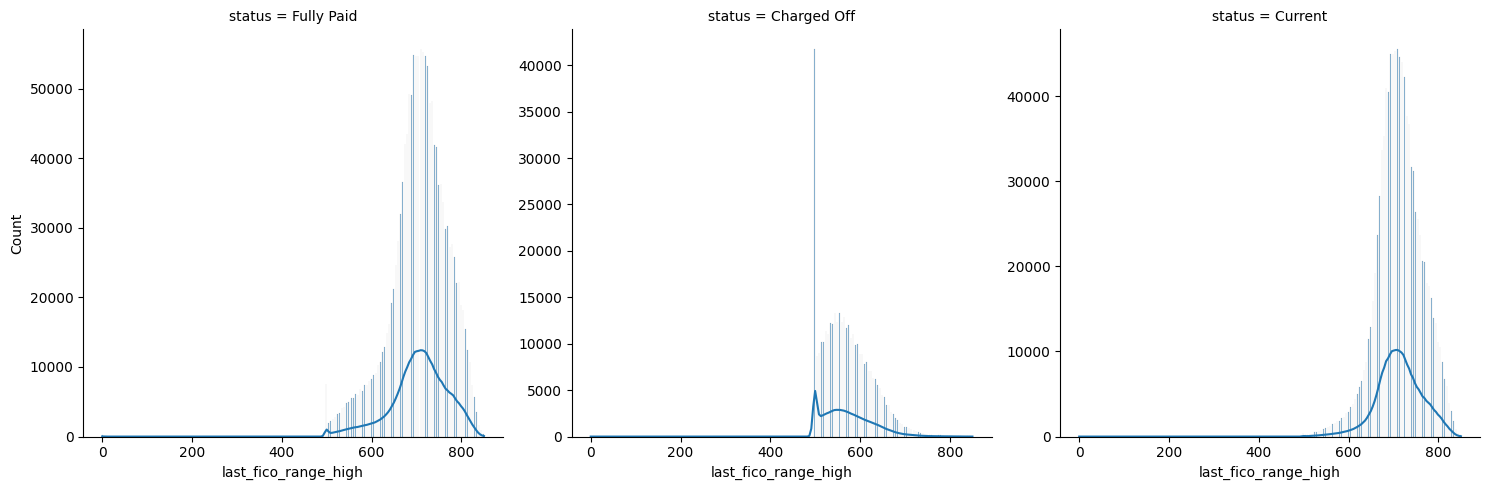

In [26]:
## Plotting a basic histogram using the seaborn library
### Start by plotting a histogram of the fico_range_high variable

### Getting my plotting area ready - I do not need to start with a plot grid for most of the charts 

# Baisc plotting object for histograms in Seaborn library is displot: {histplot, kdeplot, ecdfplot}
g = sns.displot(data=df_status_vars[df_status_vars.status.isin(['Fully Paid', 'Charged Off', 'Current'])]
               , x='last_fico_range_high'
               # , hue='CP_elig'
               , col='status'
               , kind = 'hist'
               , kde=True
               , facet_kws=dict(sharey=False)
               ,
               )

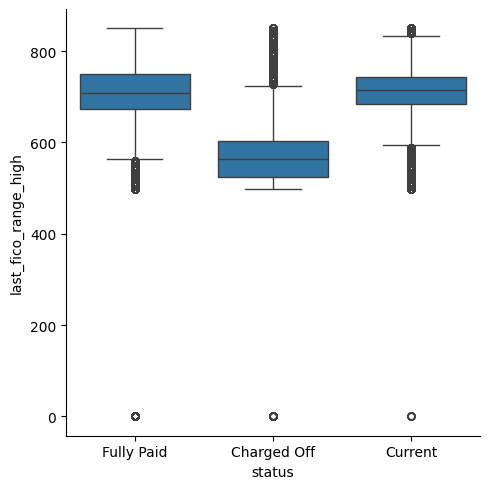

In [30]:
g = sns.catplot(data=df_status_vars[df_status_vars.status.isin(['Fully Paid', 'Charged Off', 'Current'])]
                , x='status', y='last_fico_range_high'
                # , hue='CP_elig'
                , kind='box'
                # , facet_kws=dict(sharey=False)
                ,
               )

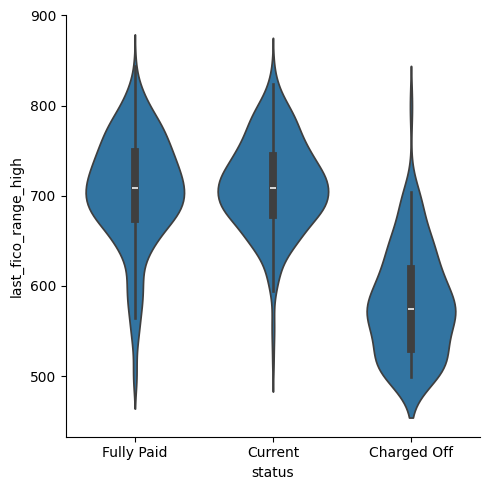

In [34]:
sns.catplot(data=df_status_vars[df_status_vars.status.isin(['Fully Paid', 'Charged Off', 'Current'])].sample(1000)
            , x='status', y='last_fico_range_high'
            , kind='violin'
            , 
           )

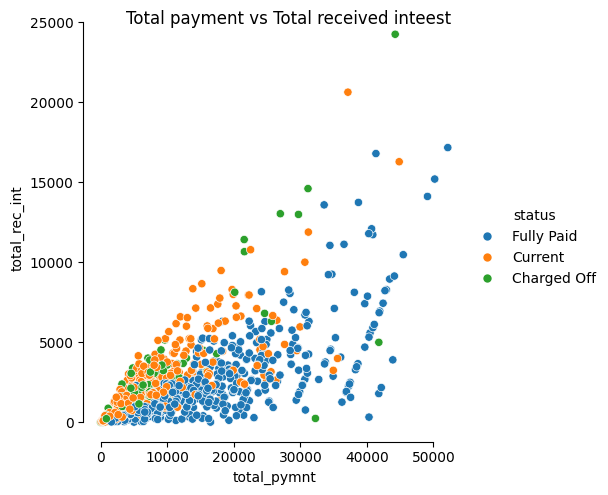

In [49]:
g = sns.relplot(data=df_status_vars[df_status_vars.status.isin(['Fully Paid', 'Charged Off', 'Current'])].sample(1000)
            , x='total_pymnt', y='total_rec_int'
            , hue='status'
            , kind='scatter'
            ,
           )
g.fig.suptitle('Total payment vs Total received inteest')
g.despine(trim=True)

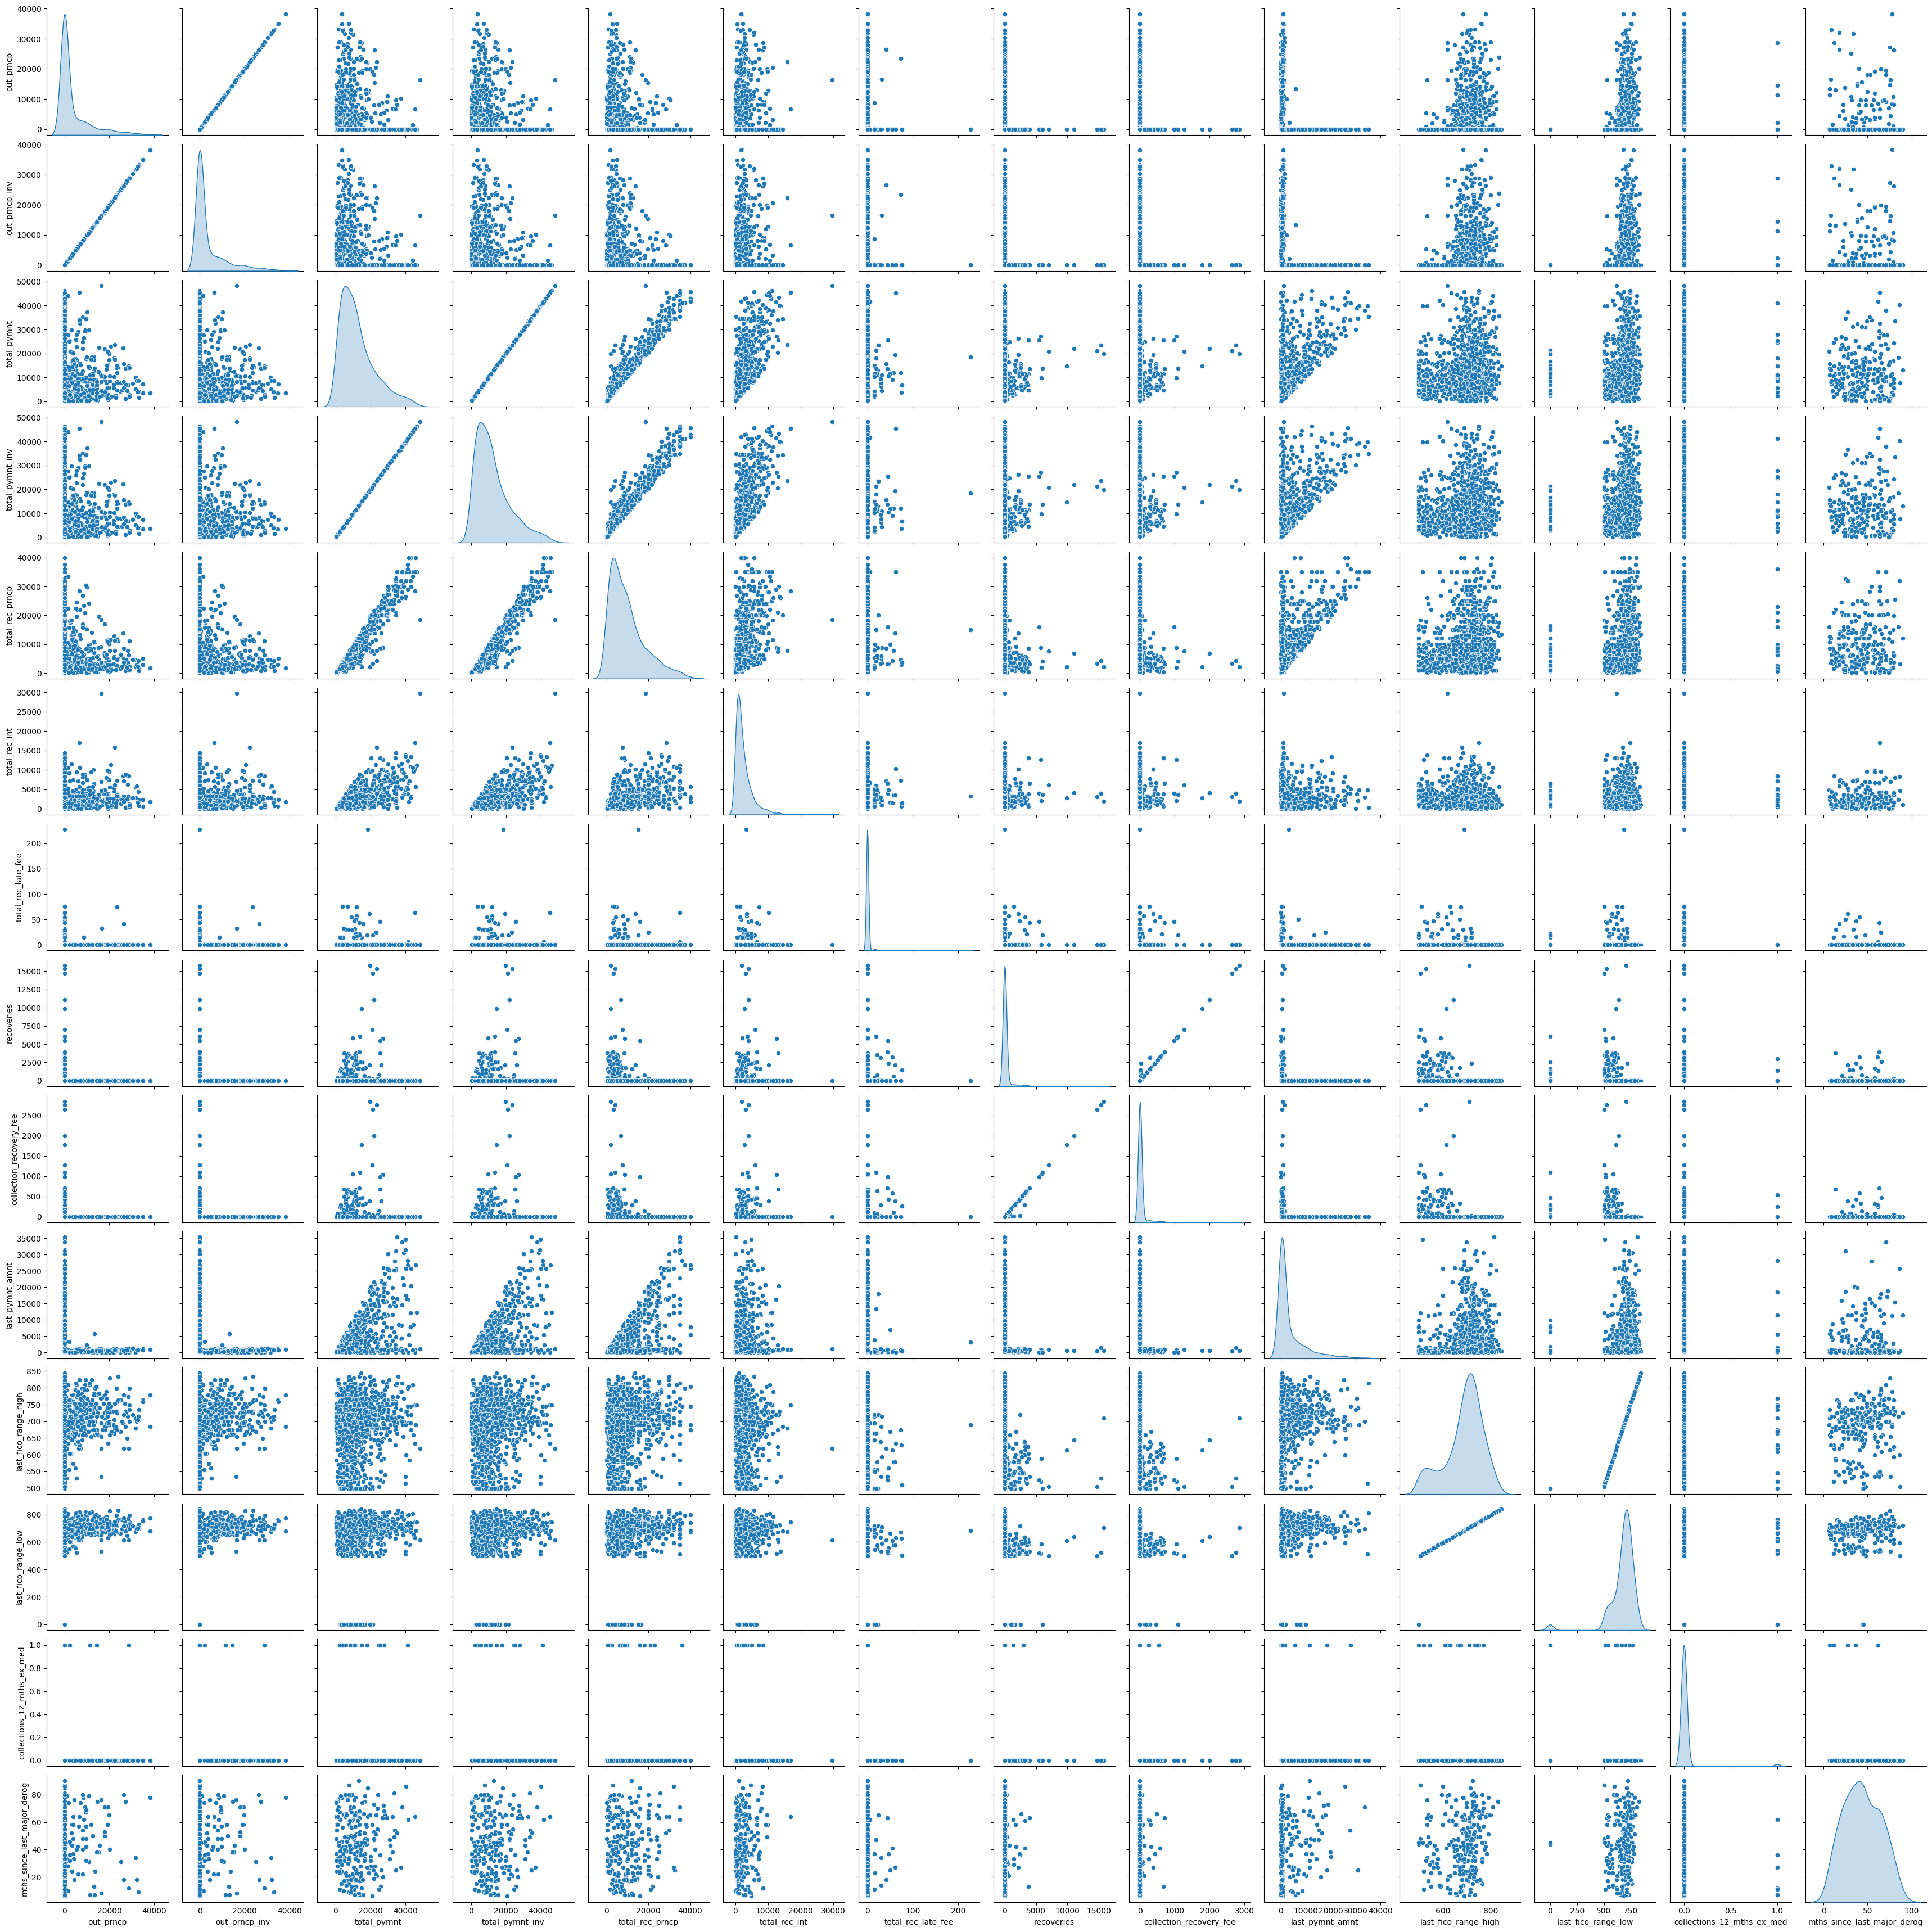

In [39]:
sns.pairplot(data=df_status_vars[df_status_vars.status.isin(['Fully Paid', 'Charged Off', 'Current'])].sample(1000)
             , diag_kind='kde'
            )

In [50]:
## Next step: collection_attrs

In [83]:
df_coll_vars = df[attr_grps['collection_attrs']]

In [84]:
df_coll_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925493 entries, 1077501 to 99799684
Data columns (total 17 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   pymnt_plan                                  object 
 1   payment_plan_start_date                     object 
 2   hardship_flag                               object 
 3   hardship_type                               object 
 4   hardship_reason                             object 
 5   hardship_status                             object 
 6   deferral_term                               float64
 7   hardship_amount                             float64
 8   hardship_start_date                         object 
 9   hardship_end_date                           object 
 10  hardship_length                             float64
 11  hardship_dpd                                float64
 12  hardship_loan_status                        object 
 13  orig_projected_additional

In [92]:
df_coll_vars.head()

,pymnt_plan,payment_plan_start_date,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hdsp_rsn
id,,,,,,,,,,,,,,,,,,
1077501,n,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,nan
1077430,n,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,nan
1077175,n,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,nan
1076863,n,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,nan
1075358,n,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,nan


In [123]:
df_coll_vars.hdsp_rsn.value_counts()*100.0/len(df_coll_vars[df_coll_vars.hdsp_rsn.notna()])

hdsp_rsn
reduced_inc     73.093043
unemployment    18.844686
medical          2.332349
nat_dis          2.019745
excess_oblig     1.865183
financial        1.292887
divorce          0.209563
death            0.204690
disability       0.137852
Name: count, dtype: float64

In [121]:
df_coll_vars.loc[:,'hdsp_rsn'] = df_coll_vars.hardship_reason.map(lambda x: np.where(re.search('(INC)|(RED)', str(x)), 'Reduced_inc'
                                                                            , np.where(re.search('(UNEMPLOY)|(FURLOUGH)', str(x)), 'Unemployment'
                                                                                , np.where(re.search('DISAST', str(x)), 'Nat_dis'
                                                                                    , np.where(re.search('DEATH', str(x)), 'Death'
                                                                                        , np.where(re.search('EXCESS', str(x)), 'excess_oblig', x)
                                                                                    )
                                                                                )
                                                                        )
                                                                   )
                                                           )

In [122]:
df_coll_vars.loc[:,'hdsp_rsn'] = df_coll_vars['hdsp_rsn'].str.lower()
df_coll_vars.loc[df_coll_vars.hdsp_rsn=='nan'] = None
# pd.crosstab(df_coll_vars.hdsp_rsn, df_coll_vars.hardship_reason)